# Contents

[Imports](#Imports)<br>
[Table_creation](#Table_creation)<br>
[Analysis](#Analysis)<br>
[Plots](#Plots)

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# df_tags = pd.read_csv('../data/raw/ml-25m/tags.csv')
# df_gscores = pd.read_csv('../data/raw/ml-25m/genome-scores.csv')
# df_gtags = pd.read_csv('../data/raw/ml-25m/genome-tags.csv')
# df_links = pd.read_csv('../data/raw/ml-25m/links.csv')
df_movies = pd.read_csv('../data/raw/ml-25m/movies.csv')
df_ratings = pd.read_csv('../data/raw/ml-25m/ratings.csv')

In [3]:
display(df_movies.head())
print(df_movies.info())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


# Table_creation

All genres of a movie are displayed in one column. This is not good for data analysis and machine learning, <br>
thus we create new columns according to all genres, and assign 1 if a movie is asociated with that genre and 0 if not.

In [4]:
# hot-one encoding to split genres in separate columns using pandas strin method
df_movies = pd.concat([df_movies, df_movies['genres'].str.get_dummies(sep='|')], axis=1)
# removing unnecessary columns
df_movies.drop(['title','genres'], axis=1, inplace=True)
# rename column to avoid spaces
df_movies.rename(columns={'(no genres listed)':'no_genre_listed'}, inplace=True)

This is what the new df_movies looks like:

In [5]:
df_movies.head()

,movieId,no_genre_listed,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plots

In [ ]:
frequency_genres = df_movies.iloc[:,1:].sum()#.sort_values(ascending=False)

# The following graphs are not used in the report and thus deactivated.

# fig, ax = plt.subplots(figsize=(18, 10))
# # remove axes and frame of subplot figure
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# ax.axis('off')
# plt.subplots_adjust(hspace=0.5) # prevents overlapping of single plots

# plt.subplot(221)
# plt.pie(frequency_genres, labels = frequency_genres.index, autopct = lambda x: str(round(x, 1)) + '%',\
#         pctdistance = 0.7, labeldistance = 1.05, shadow = True)
# plt.subplot(222)
# plt.bar(frequency_genres.index, frequency_genres)[8].set_color('gray')
# plt.title('Frequency of genres in ML25 dataset (one movie can represent genres)')
# plt.xticks(rotation=75)
# plt.subplot(223)
# colors = sns.color_palette('terrain')[0:]
# plt.pie(frequency_genres, labels = frequency_genres.index, autopct = lambda x: str(round(x, 1)) + '%',\
#         pctdistance = 0.7, labeldistance = 1.05, shadow = True, rotatelabels=True, colors=colors)
# plt.subplot(224)
# sns.barplot(x = frequency_genres.index, y = frequency_genres, hue = frequency_genres.index, palette='terrain')
# plt.title('Frequency of genres in ML25 dataset (one movie can represent genres)')
# plt.xticks(rotation=75)
# plt.xlabel('')
# plt.ylabel('');

In [7]:
pd.DataFrame(frequency_genres, columns=['n_movies'])

,n_movies
no_genre_listed,5062
Action,7348
Adventure,4145
Animation,2929
Children,2935
Comedy,16870
Crime,5319
Documentary,5605
Drama,25606
Fantasy,2731


In [28]:
import plotly.graph_objects as go

In [58]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=frequency_genres.index, values=frequency_genres, direction='clockwise'))
fig.update_layout(legend_title = 'Genres', title='Proportions of genres', title_x=0.45, title_y=0.95)
fig.update_layout(autosize=False, width=600, height=600)

In [9]:
display(df_ratings.head())
print(df_ratings.info())
df_ratings.isna().sum()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
# calculate average rating of each movie
rating_avg = df_ratings.drop(['userId','timestamp'], axis=1).groupby('movieId').mean()
rating_avg.rename(columns={'rating':'rating_avg'}, inplace=True)
rating_avg.head()

,rating_avg
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434


<code style="background:yellow;color:black">Is it ok to replace NaNs in rating_avg with mean? => yes, possibly replace with avg of movies with respective genres.</code>

In [11]:
import sys
# join df_movies and average rating
genre_ratings = df_movies.merge(right=rating_avg, on = 'movieId', how = 'left')
print('The column \'rating_avg\' does contain %i missing values and is of type %s.' % (genre_ratings.rating_avg.isna().sum(), genre_ratings.rating_avg.dtypes))
# replace NaNs with mean or drop NaNs? => replace
mean = genre_ratings.rating_avg.mean()
print('The missing values are replaced with the mean rating which is %.2f.' % mean)
#genre_ratings.rating_avg.fillna(mean, inplace=True) # throws warning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method
genre_ratings.fillna({'rating_avg':mean}, inplace=True) # alternative 1
#genre_ratings.rating_avg = genre_ratings.rating_avg.fillna(mean) # alternative 2

# casting all columns to float so they can hold average rating which is float
genre_ratings = genre_ratings.astype('float64')

# multiply each genre column with rating_avg
for column in genre_ratings:
    if column != 'movieId' and column != 'rating_avg':
        genre_ratings[column] = genre_ratings[column] * genre_ratings['rating_avg']

The column 'rating_avg' does contain 3376 missing values and is of type float64.
The missing values are replaced with the mean rating which is 3.07.


In [12]:
display(genre_ratings.head())
genre_ratings.info()

,movieId,no_genre_listed,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_avg
0,1.0,0.0,0.0,3.893708,3.893708,3.893708,3.893708,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.893708
1,2.0,0.0,0.0,3.251527,0.000000,3.251527,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.251527
2,3.0,0.0,0.0,0.000000,0.000000,0.000000,3.142028,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,3.142028,0.0,0.0,0.0,0.0,3.142028
3,4.0,0.0,0.0,0.000000,0.000000,0.000000,2.853547,0.0,0.0,2.853547,...,0.0,0.0,0.0,0.0,2.853547,0.0,0.0,0.0,0.0,2.853547
4,5.0,0.0,0.0,0.000000,0.000000,0.000000,3.058434,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.058434


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movieId          62423 non-null  float64
 1   no_genre_listed  62423 non-null  float64
 2   Action           62423 non-null  float64
 3   Adventure        62423 non-null  float64
 4   Animation        62423 non-null  float64
 5   Children         62423 non-null  float64
 6   Comedy           62423 non-null  float64
 7   Crime            62423 non-null  float64
 8   Documentary      62423 non-null  float64
 9   Drama            62423 non-null  float64
 10  Fantasy          62423 non-null  float64
 11  Film-Noir        62423 non-null  float64
 12  Horror           62423 non-null  float64
 13  IMAX             62423 non-null  float64
 14  Musical          62423 non-null  float64
 15  Mystery          62423 non-null  float64
 16  Romance          62423 non-null  float64
 17  Sci-Fi      

In [13]:
genre_ratings_agg = genre_ratings.drop(['movieId','rating_avg'], axis=1)
# replace 0s with NaN so they do not influence the average
genre_ratings_agg = genre_ratings_agg.replace({0:np.nan})
genre_ratings_agg = genre_ratings_agg.mean()
genre_ratings_agg

no_genre_listed    3.050835
Action             2.934973
Adventure          3.015595
Animation          3.100962
Children           3.033952
Comedy             3.043310
Crime              3.091499
Documentary        3.374056
Drama              3.174201
Fantasy            3.021986
Film-Noir          3.315346
Horror             2.667807
IMAX               3.252121
Musical            3.195997
Mystery            3.047038
Romance            3.143034
Sci-Fi             2.768572
Thriller           2.949208
War                3.236795
Western            3.033679
dtype: float64

In [ ]:
# The following graphs are not used in the report and thus deactivated.

# fig, ax = plt.subplots(figsize=(18, 6))
# # remove axes and frame of subplot figure
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# ax.axis('off')

# plt.subplot(121)
# plt.bar(genre_ratings_agg.sort_values(ascending=False).index, genre_ratings_agg.sort_values(ascending=False))[9].set_color('gray')
# plt.title('average movie rating per genre')
# plt.xticks(rotation=75)
# plt.subplot(122)
# sns.barplot(x = genre_ratings_agg.sort_values(ascending=False).index, y = genre_ratings_agg.sort_values(ascending=False),
#             hue = genre_ratings_agg.sort_values(ascending=False).index, palette='terrain')
# plt.title('average movie rating per genre')
# plt.xticks(rotation=75)
# plt.xlabel('')
# plt.ylabel('');

In [59]:
genre_ratings_agg.sort_values(ascending=False)

Documentary        3.374056
Film-Noir          3.315346
IMAX               3.252121
War                3.236795
Musical            3.195997
Drama              3.174201
Romance            3.143034
Animation          3.100962
Crime              3.091499
no_genre_listed    3.050835
Mystery            3.047038
Comedy             3.043310
Children           3.033952
Western            3.033679
Fantasy            3.021986
Adventure          3.015595
Thriller           2.949208
Action             2.934973
Sci-Fi             2.768572
Horror             2.667807
dtype: float64

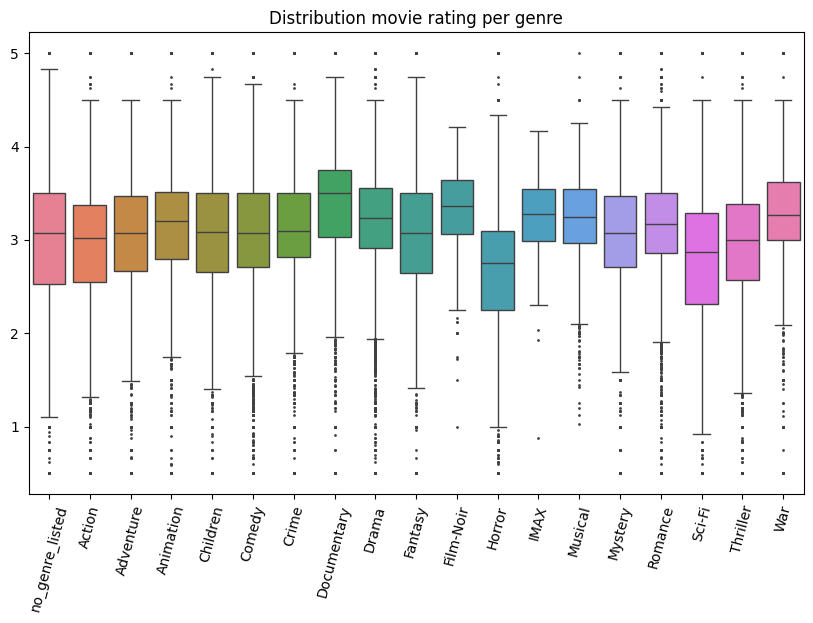

In [24]:
fig = plt.subplots(figsize=(10, 6))
sns.boxplot(genre_ratings.replace({0:np.nan}).iloc[:,1:-2], fliersize=1)
plt.title('Distribution movie rating per genre')
plt.xticks(rotation=75);


<div class="alert alert-block alert-warning"><b>Warning:</b> matplotlib does not handle NaNs in boxplots well (see example below).</div>

,action,drama,thriller
0,4,NaN,1
1,4,2.0,1
2,0,3.0,3
3,5,4.0,5
4,3,NaN,5


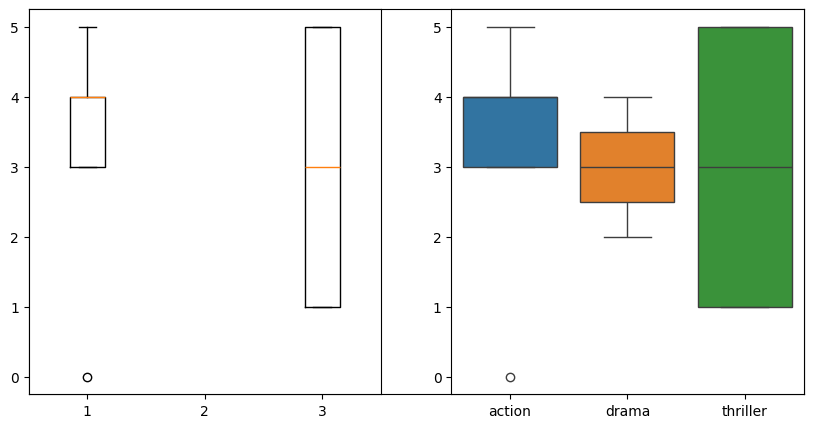

In [ ]:
df = pd.DataFrame({'action': [4,4,0,5,3], 'drama':[np.nan,2,3,4,np.nan],'thriller':[1,1,3,5,5]})
display(df)
fig, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.subplot(121)
plt.boxplot(df)
plt.subplot(122)
sns.boxplot(df);